TA-Lib not found. Using Pandas for technical indicators.
Loading News Data...
Loading news data from ../data/raw\raw_analyst_ratings.csv...
Top Keywords:
[('stocks', 159102), ('shares', 112655), ('reports', 108429), ('market', 89225), ('update:', 85354), ('earnings', 80855), ('sales', 77924), ('announces', 66513), ('price', 63328), ('downgrades', 61862)]
Calculating sentiment scores... this might take a moment.

Daily Sentiment Head:
date_only
2011-04-28    0.045455
2011-04-29    0.166667
2011-04-30    0.500000
2011-05-01    0.000000
2011-05-02   -0.009259
Name: sentiment_score, dtype: float64

Loading Stock Data (AAPL)...
Loading stock data for AAPL...


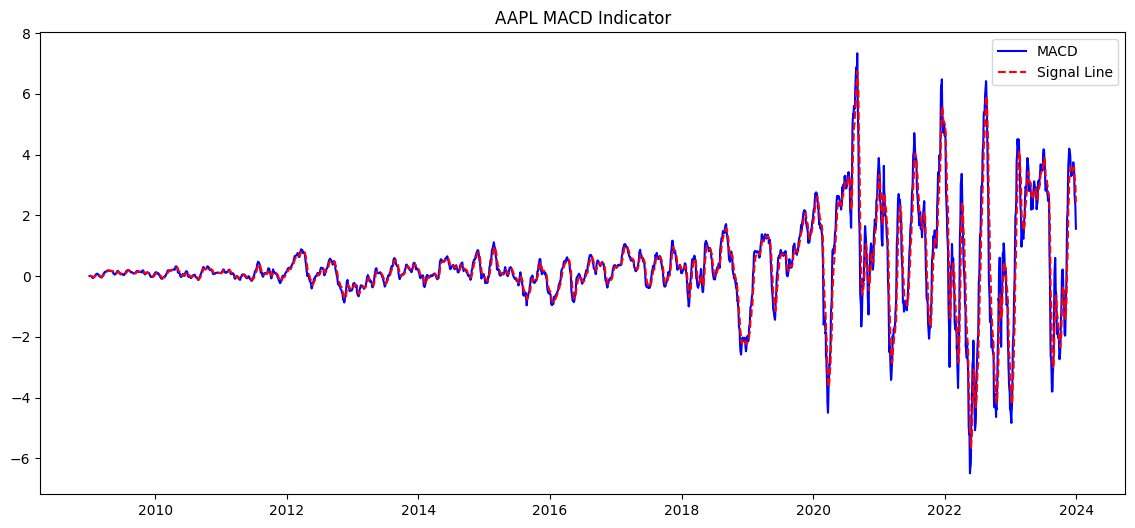


Merged Data Points: 2222

Pearson Correlation Coefficient: -0.0018
P-Value: 0.9332


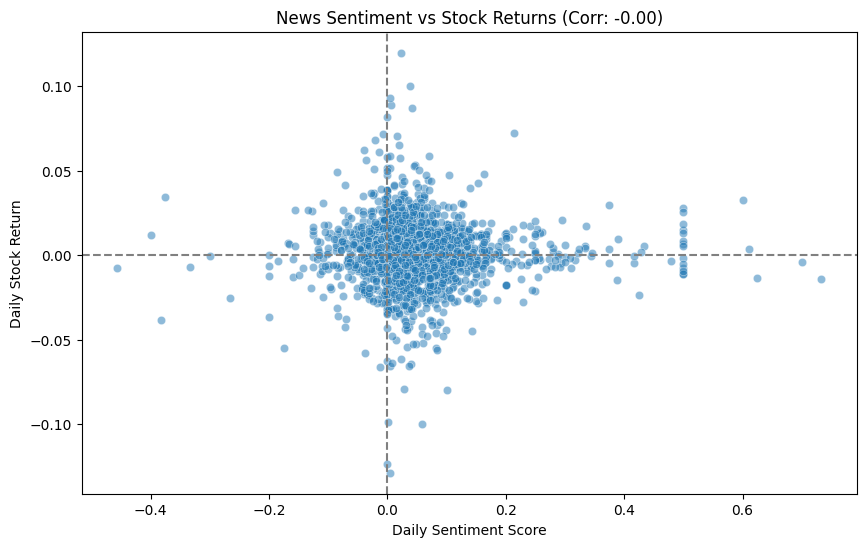

Final Analysis Complete.


In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Add src to path
sys.path.append(os.path.abspath(os.path.join('..')))

from src.loader import DataLoader
from src.analysis import NewsAnalyzer, StockAnalyzer

# --- SETUP ---
DATA_PATH = '../data/raw'
loader = DataLoader(DATA_PATH)

# ==========================================
# TASK 1 & 3: NEWS & SENTIMENT ANALYSIS
# ==========================================
print("Loading News Data...")
news_df = loader.load_news_data('raw_analyst_ratings.csv')
news_analyzer = NewsAnalyzer(news_df)

# 1. Keyword Extraction (Rubric Task 1)
print("Top Keywords:")
print(news_analyzer.extract_common_keywords(n=10))

# 2. Sentiment Analysis (Rubric Task 3)
# This adds a 'sentiment_score' column
news_df_scored = news_analyzer.perform_sentiment_analysis()

# 3. Aggregate Daily Sentiment
daily_sentiment = news_analyzer.get_daily_sentiment()
print("\nDaily Sentiment Head:")
print(daily_sentiment.head())


# ==========================================
# TASK 2: STOCK ANALYSIS (MACD & RETURNS)
# ==========================================
print("\nLoading Stock Data (AAPL)...")
stock_df = loader.load_stock_data('AAPL')
stock_analyzer = StockAnalyzer(stock_df)

# 1. Calculate Indicators (MACD, RSI, SMA)
stock_df = stock_analyzer.add_moving_average(20)
stock_df = stock_analyzer.add_rsi(14)
stock_df = stock_analyzer.add_macd()

# 2. Calculate Daily Returns (Rubric Task 3)
stock_df = stock_analyzer.calculate_daily_returns()

# 3. Visualization: MACD (Rubric Task 2)
plt.figure(figsize=(14, 6))
plt.plot(stock_df.index, stock_df['MACD'], label='MACD', color='blue')
plt.plot(stock_df.index, stock_df['MACD_Signal'], label='Signal Line', color='red', linestyle='--')
plt.title('AAPL MACD Indicator')
plt.legend()
plt.savefig('../macd_chart.png')
plt.show()


# ==========================================
# TASK 3: CORRELATION ANALYSIS (THE FINALE)
# ==========================================
# 1. Date Alignment
# Convert stock index to date-only for merging
stock_df['date_only'] = stock_df.index.date

# Convert daily_sentiment series to dataframe
sentiment_df = daily_sentiment.to_frame(name='sentiment_score')
sentiment_df.index.name = 'date_only'

# Merge on Date
merged_df = pd.merge(stock_df, sentiment_df, left_on='date_only', right_index=True, how='inner')

print(f"\nMerged Data Points: {len(merged_df)}")

# 2. Calculate Correlation
# Drop NaN values created by returns calculation
clean_data = merged_df.dropna(subset=['daily_return', 'sentiment_score'])

correlation, p_value = pearsonr(clean_data['sentiment_score'], clean_data['daily_return'])
print(f"\nPearson Correlation Coefficient: {correlation:.4f}")
print(f"P-Value: {p_value:.4f}")

# 3. Visualize Correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clean_data, x='sentiment_score', y='daily_return', alpha=0.5)
plt.title(f'News Sentiment vs Stock Returns (Corr: {correlation:.2f})')
plt.xlabel('Daily Sentiment Score')
plt.ylabel('Daily Stock Return')
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.savefig('../correlation_plot.png')
plt.show()

print("Final Analysis Complete.")